In [1]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import os


In [2]:
dirs = os.listdir(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2")
print(type(dirs),dirs)
dirs.sort
print(dirs)
point=np.zeros(40)
j=0
import ntpath

for filename in os.listdir(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2"):
    x = np.load(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2"+"\\"+filename)
    if 'sleep' in filename:
        point[j]=0
    else:
        point[j]=1
    j=j+1  
#print(dirs)
#print(point)

<class 'list'> ['.ipynb_checkpoints', '2ndexc_thirdpart (1).ipynb', 'sleep_00.npz', 'sleep_01.npz', 'sleep_02.npz', 'sleep_03.npz', 'sleep_04.npz', 'sleep_05.npz', 'sleep_06.npz', 'sleep_07.npz', 'sleep_08.npz', 'sleep_09.npz', 'sleep_10.npz', 'sleep_11.npz', 'sleep_12.npz', 'sleep_13.npz', 'sleep_14.npz', 'sleep_15.npz', 'sleep_16.npz', 'sleep_17.npz', 'sleep_18.npz', 'sleep_19.npz', 'step_00.npz', 'step_01.npz', 'step_02.npz', 'step_03.npz', 'step_04.npz', 'step_05.npz', 'step_06.npz', 'step_07.npz', 'step_08.npz', 'step_09.npz', 'step_10.npz', 'step_11.npz', 'step_12.npz', 'step_13.npz', 'step_14.npz', 'step_15.npz', 'step_16.npz', 'step_17.npz', 'step_18.npz', 'step_19.npz']
['.ipynb_checkpoints', '2ndexc_thirdpart (1).ipynb', 'sleep_00.npz', 'sleep_01.npz', 'sleep_02.npz', 'sleep_03.npz', 'sleep_04.npz', 'sleep_05.npz', 'sleep_06.npz', 'sleep_07.npz', 'sleep_08.npz', 'sleep_09.npz', 'sleep_10.npz', 'sleep_11.npz', 'sleep_12.npz', 'sleep_13.npz', 'sleep_14.npz', 'sleep_15.npz', 'sl

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Thanasis\\Documents\\DSP\\DSP20_LAB2\\.ipynb_checkpoints'

In [ ]:
def short_time_energy(x, window, window_length):
    window = sp.signal.get_window(window, window_length)#uses scipy to make the window 
    return sp.signal.convolve(x**2, window, mode="same")

In [ ]:
def teo(sig):
    sig_sq=sig*sig
    sig1=np.roll(sig,1)
    sig1[0]=0.0
    sig2=np.roll(sig,-1)
    sig2[len(sig)-1]=0.0
    sig_mult=-sig1*sig2
    y_sig=sig_sq-sig_mult
    y_sig[0]=y_sig[1]
    y_sig[-1]=y_sig[-2]
    return y_sig

In [ ]:
def gaborfil(sig,fc,a,fs):
    b=a/fs
    N=int((3/b)+1)
    n=np.linspace(-N,N,2*N)
    phase=(2*np.pi*n)*(fc/fs)
    H=np.exp(-(b**2)*(n**2))*np.cos(phase)
    filtered=sp.signal.lfilter(H,1,sig)
    return filtered  

In [ ]:
def binof_c(sig):
    bino=0.25*sp.signal.unit_impulse(len(sig),1)+0.5*sp.signal.unit_impulse(len(sig),0)+0.25*sp.signal.unit_impulse(len(sig),-1)
    h_bino=np.convolve(sig,bino,'same')
    return h_bino

In [ ]:
def max_mte_acc_gyr(sig,a,):
    sig=np.pad(sig,(0,12000-len(sig)),'constant')
    j=0
    sig_w=np.zeros((117,400))
    sig_w[0,:]=sig[0:400]*sp.signal.get_window("hamming", 400)
    j=1
    for i in range(400,12000,100):
        #y_acc2_en[i-300:i+100]=y_acc2[i-300:i+100]*np.hamming(400)
        sig_w[j,:]=sig[i-300:i+100]*np.hamming(400)
        j=j+1
       #y_w_acc2_en[j,400*j-300:400*j+100]=np.convolve(y_acc2[400*j-300:400*j+100],sp.signal.get_window("hamming",400),mode="same")
    a=20/50
    f_c_min=a/2
    f_c_max=(20-a)/2
    f_c_val=np.linspace(f_c_min,f_c_max,25)
    f_me_en=np.zeros(((117,25,400)))
    f_me_teo_en=np.zeros(((117,25,400)))
    for i_f0 in range(0,25):
        f_me_en[0,i_f0,:]=gaborfil(sig_w[0,0:400],f_c_val[i_f0],20/50,20)
    for j in range(1,117):
        for i_f in range(0,25):
            f_me_en[j,i_f,:]=gaborfil(sig_w[j,:],f_c_val[i_f],20/50,20)    
    for j in range(0,117):
        for i_f in range(0,25):
            f_me_teo_en[j,i_f,:]=teo(f_me_en[j,i_f,:])
    bi_f_teo_en=np.zeros(((117,25,400)))
    for j in range(0,117):
        for i_f in range(0,25):    
            bi_f_teo_en[j,i_f,:]=binof_c(f_me_teo_en[j,i_f,:])
    for j in range(0,117):
        for i_f in range(0,25):    
            bi_f_teo_en[j,i_f,:]=binof_c(bi_f_teo_en[j,i_f,:])       
    me_te_f=np.zeros(((117,25,1)))
    for j in range(0,117):
        for i_f in range(0,25):    
            me_te_f[j,i_f,:]=sum(bi_f_teo_en[j,i_f,bi_f_teo_en[j,i_f,:]>0])/len(bi_f_teo_en[j,i_f,bi_f_teo_en[j,i_f,:]>0])
    max_me_te_f=np.zeros(117)
    max_me_te_f_temp=np.zeros((117,25))
    max_me_te_f_arg=np.zeros(117)
    for j in range(0,117):
        for i_f in range(0,25):
            max_me_te_f_temp[j,i_f]=me_te_f[j,i_f,:]
        max_me_en=np.max(max_me_te_f_temp[j,:])
        arg_max_me_en=np.argmax(max_me_te_f_temp[j,:])
        max_me_te_f[j]=max_me_en
        max_me_te_f_arg[j]=arg_max_me_en
    return max_me_te_f     

In [3]:
def max_mte_hrm(sig,a,):
    sig=np.pad(sig,(0,3000-len(sig)),'constant')
    
    j=0
    sig_w=np.zeros((117,100))
    sig_w[0,:]=sig[0:100]*sp.signal.get_window("hamming", 100)
    j=1
    for i in range(100,3000,25):
        #y_acc2_en[i-300:i+100]=y_acc2[i-300:i+100]*np.hamming(400)
        sig_w[j,:]=sig[i-75:i+25]*np.hamming(100)
        j=j+1
       #y_w_acc2_en[j,400*j-300:400*j+100]=np.convolve(y_acc2[400*j-300:400*j+100],sp.signal.get_window("hamming",400),mode="same")
    a=5/50
    f_c_min=a/2
    f_c_max=(5-a)/2
    f_c_val=np.linspace(f_c_min,f_c_max,25)
    f_me_en=np.zeros(((117,25,100)))
    f_me_teo_en=np.zeros(((117,25,100)))
    for i_f0 in range(0,25):
        f_me_en[0,i_f0,:]=gaborfil(sig_w[0,0:100],f_c_val[i_f0],5/50,5)
    for j in range(1,117):
        for i_f in range(0,25):
            f_me_en[j,i_f,:]=gaborfil(sig_w[j,:],f_c_val[i_f],5/50,5)    
    for j in range(0,117):
        for i_f in range(0,25):
            f_me_teo_en[j,i_f,:]=teo(f_me_en[j,i_f,:])
    bi_f_teo_en=np.zeros(((117,25,100)))
    for j in range(0,117):
        for i_f in range(0,25):    
            bi_f_teo_en[j,i_f,:]=binof_c(f_me_teo_en[j,i_f,:])
    for j in range(0,117):
        for i_f in range(0,25):    
            bi_f_teo_en[j,i_f,:]=binof_c(bi_f_teo_en[j,i_f,:])       
    me_te_f=np.zeros(((117,25,1)))
    for j in range(0,117):
        for i_f in range(0,25):    
            me_te_f[j,i_f,:]=sum(bi_f_teo_en[j,i_f,bi_f_teo_en[j,i_f,:]>0])/len(bi_f_teo_en[j,i_f,bi_f_teo_en[j,i_f,:]>0])
    max_me_te_f=np.zeros(117)
    max_me_te_f_temp=np.zeros((117,25))
    max_me_te_f_arg=np.zeros(117)
    for j in range(0,117):
        for i_f in range(0,25):
            max_me_te_f_temp[j,i_f]=me_te_f[j,i_f,:]
        max_me_en=np.max(max_me_te_f_temp[j,:])
        arg_max_me_en=np.argmax(max_me_te_f_temp[j,:])
        max_me_te_f[j]=max_me_en
        max_me_te_f_arg[j]=arg_max_me_en
    return max_me_te_f     

In [4]:
def calculate_values(ste):
    values=np.zeros(4)
    values[0]=np.mean(ste)
    values[1]=np.min(ste)
    values[2]=np.max(ste)
    values[3]=np.std(ste)
    return values   

In [5]:
dirs = os.listdir(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2")
useful_val=np.zeros((40,56))
j=0
print(dirs[0])

.ipynb_checkpoints


In [76]:
for filename,j in zip(dirs,range(len(dirs))):
        
    x = np.load(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2"+"\\"+filename)
    mmte_acc=max_mte_acc_gyr(x['acc'][:,0],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,0:4]=acc_val
    mmte_acc=max_mte_acc_gyr(x['acc'][:,1],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,4:8]=acc_val
    mmte_acc=max_mte_acc_gyr(x['acc'][:,2],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,8:12]=acc_val
    mmte_acc=max_mte_acc_gyr(x['gyr'][:,0],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,12:16]=acc_val
    mmte_acc=max_mte_acc_gyr(x['gyr'][:,1],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,16:20]=acc_val
    mmte_acc=max_mte_acc_gyr(x['gyr'][:,2],20/50)
    acc_val=calculate_values(mmte_acc)
    useful_val[j,20:24]=acc_val
    mmte_hrm=max_mte_hrm(x['hrm'],5/50)
    acc_val=calculate_values(mmte_hrm)
    useful_val[j,24:28]=acc_val
    ste_acc=short_time_energy(x['acc'][:,0],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,28:32]=acc_val
    ste_acc=short_time_energy(x['acc'][:,1],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,32:36]=acc_val
    ste_acc=short_time_energy(x['acc'][:,2],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,36:40]=acc_val
    ste_acc=short_time_energy(x['gyr'][:,0],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,40:44]=acc_val
    ste_acc=short_time_energy(x['gyr'][:,1],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,44:48]=acc_val
    ste_acc=short_time_energy(x['gyr'][:,2],sp.signal.get_window("hamming", 400),400)
    acc_val=calculate_values(ste_acc)
    useful_val[j,48:52]=acc_val
    ste_hrm=short_time_energy(x['hrm'],sp.signal.get_window("hamming", 100),100)
    acc_val=calculate_values(ste_hrm)
    useful_val[j,52:56]=acc_val
    #print(useful_val)

[[3.87131699e-01 4.17202259e-03 2.43075002e+01 ... 2.79697355e+07
  6.21242279e+07 3.42358884e+06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[3.87131699e-01 4.17202259e-03 2.43075002e+01 ... 2.79697355e+07
  6.21242279e+07 3.42358884e+06]
 [3.06003728e-01 4.70203940e-02 1.73270241e+01 ... 2.49183514e+07
  6.41460958e+07 3.77237249e+06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]

In [77]:
print(useful_val)

[[3.87131699e-01 4.17202259e-03 2.43075002e+01 ... 2.79697355e+07
  6.21242279e+07 3.42358884e+06]
 [3.06003728e-01 4.70203940e-02 1.73270241e+01 ... 2.49183514e+07
  6.41460958e+07 3.77237249e+06]
 [2.28623458e-01 2.08186793e-01 2.62559985e-01 ... 2.25697831e+07
  5.96147498e+07 3.20842379e+06]
 ...
 [1.08576308e+02 1.84001277e-02 8.71576421e+02 ... 1.20451435e+07
  5.71418141e+07 6.61004178e+06]
 [3.75035036e+02 7.33607058e-01 4.02880692e+03 ... 8.44651300e+06
  4.60882684e+07 6.42765058e+06]
 [3.37061763e+02 4.63283729e-02 3.84996880e+03 ... 9.05048745e+06
  4.21153399e+07 6.09680468e+06]]


In [78]:
np.save(r"C:\Users\Thanasis\Documents\DSP\array_thirdpart_n.npy",useful_val,allow_pickle=True)

In [6]:
useful_test=np.load(r"C:\Users\Thanasis\Documents\DSP\array_thirdpart_n.npy",allow_pickle=True)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#useful_test = StandardScaler().fit_transform(useful_test)
#print(useful_test[:])

In [8]:
useful_test_k=useful_test-useful_test.mean(axis=0)

In [9]:
print(useful_test_k[2][0],useful_test.mean(axis=0)[0],useful_val[2][0])

-95.55735244180525 95.78597589978104 0.0


In [10]:
u,s,vh=np.linalg.svd(useful_test_k)
print(u.shape)
print(s.shape)
print(vh.shape)

(40, 40)
(40,)
(56, 56)


In [11]:
v=vh.T
print(v.shape)

(56, 56)


In [12]:
#print(v,u)

In [13]:
l_val=np.zeros(40)

for i,j in zip(s,range(len(s))):
    l_val[j]=(i**2)/40

add_m=sum(l_val)
for i2 in range(0,40):
    l_val[i2]=l_val[i2]/add_m
#print(l_val)    


In [14]:
u_useful=u[:,:2]
u_t=u_useful.T
print(u_useful.shape)
s_useful=np.zeros((2,2))
s_useful[0,0]=s[0]
s_useful[0,1]=0
s_useful[1,0]=0
s_useful[1,1]=s[1]
print(s_useful.shape)
v_test=np.matmul(s_useful,u_t)
#print(v_test)
y_array=(np.matmul(s_useful,u_t)).T
print(y_array)
#print(y_array)

(40, 2)
(2, 2)
[[ 1.23543797e+07 -8.40813563e+06]
 [ 1.32919781e+07 -6.46505066e+06]
 [ 6.50702382e+06 -7.40313175e+06]
 [ 2.10748967e+07 -1.90333489e+05]
 [ 8.77850543e+06 -3.25881982e+05]
 [ 2.00855763e+07 -6.32440333e+06]
 [ 4.04833827e+04 -5.89700364e+06]
 [ 7.65110473e+06 -1.29444360e+07]
 [ 3.27904881e+07  2.51686769e+06]
 [ 7.49440076e+06 -1.07907164e+07]
 [ 1.57559078e+07 -8.16133472e+06]
 [ 1.96743443e+07 -5.81421502e+06]
 [ 4.29818466e+06 -4.52133694e+06]
 [ 1.50535169e+06 -4.16545445e+06]
 [ 2.94889189e+07  2.73846746e+06]
 [ 2.98832087e+07  2.41434028e+06]
 [ 1.71639287e+07 -2.19170737e+06]
 [ 1.99894483e+07 -4.02196560e+06]
 [ 5.71719219e+06 -9.39356990e+06]
 [ 2.41648197e+07  4.13140094e+06]
 [-1.68880509e+07 -4.51077273e+06]
 [-2.28761247e+07 -7.22481072e+06]
 [-1.84265893e+07  4.96084153e+06]
 [-9.35029763e+06  3.47368049e+06]
 [-1.53425275e+07 -1.92852406e+06]
 [-2.59645014e+07 -5.45768541e+06]
 [-1.20578576e+07 -2.32001645e+06]
 [ 5.36485099e+06  4.65550015e+07]
 [ 5.

In [15]:
y_array_sl=np.zeros((20,2))
y_array_st=np.zeros((20,2))
j=0
sl_count=0
st_count=0
for i in point:
    if i==0:
        y_array_sl[sl_count,:]=y_array[j,:]
        sl_count=sl_count+1
    else:
        y_array_st[st_count,:]=y_array[j,:]
        st_count=st_count+1
    j=j+1    

IndexError: index 20 is out of bounds for axis 0 with size 20

IndexError: index 20 is out of bounds for axis 0 with size 20

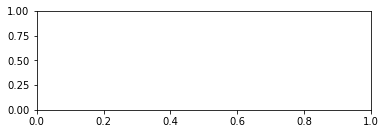

In [16]:
pca = PCA(n_components=2)
principalComponents_y_array = pca.fit_transform(useful_test)

def scat(spca):
    y_array_sl=np.zeros((20,2))
    y_array_st=np.zeros((20,2))
    j=0
    sl_count=0
    st_count=0
    for i in point:
        if i==0:
            y_array_sl[sl_count,:]=spca[j,:]
            sl_count=sl_count+1
        else:
            y_array_st[st_count,:]=spca[j,:]
            st_count=st_count+1
        j=j+1   
    plt.scatter(y_array_sl[:,0],y_array_sl[:,1],color='red',label='sleep')
    plt.scatter(y_array_st[:,0],y_array_st[:,1],color='blue',label='step')
    plt.legend()

plt.subplot(2,1,1)
scat(y_array)
plt.show()
plt.clf
plt.subplot(2,1,2)
scat(principalComponents_y_array)




In [17]:
from matplotlib import style
style.use('ggplot')
class K_Means_:
    def __init__(self, p=2, boundry=0.0001, max_iter=50):
        self.p = p
        self.boundry = boundry
        self.max_iter = max_iter
#classifications=clustes
    def fit(self,data):
        #print("in fit")
        self.centroids = {}

        for i in range(self.p):
            
            self.centroids[i] = data[i][:self.p]
            #print("i,self.centroids[i]",i,self.centroids[i])

        for i in range(self.max_iter):
            self.classifications = {}
            #print("i,self.classifications",i,self.classifications)
            for j in range(self.p):
                self.classifications[j] = []
                #print("i,self.classifications[i]")#,j,self.classifications[i])

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            #print("i,self.classifications")#,i,self.classifications)
            prev_centroids = dict(self.centroids)
            #print("i,prev_centroids",i,prev_centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                #print("classification,self.centroids[classification]",classification,self.centroids[classification])
            
            optimized = False
            for c in self.centroids:
                #print("in the mess")
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                #print("original_centroid",original_centroid,"current_centroid",current_centroid)
                #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0),self.tol)
                
                if np.abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0))<self.boundry:
                    print(np.abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0)))
                    optimized = True
                #print(np.abs(np.sum((current_centroid-original_centroid)/original_centroid*100.0)))

                
            if optimized:
                break

    def predict(self,data):
        self.centroids = {}
        for i in range(self.p):
            
            self.centroids[i] = data[i][:2]
            #print("i,self.centroids[i]",i,self.centroids[i])
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification+1

2
0.0
0.0
<bound method K_Means_.predict of <__main__.K_Means_ object at 0x000001416664F808>>


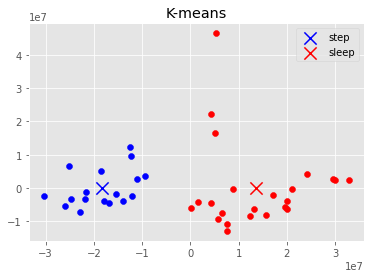

IndexError: index 20 is out of bounds for axis 0 with size 20

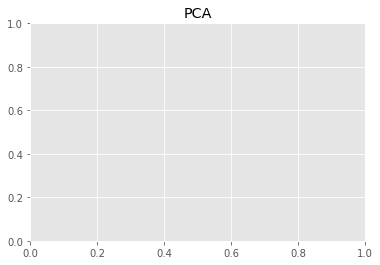

In [18]:
model = K_Means_(p=2)
print(model.predict(principalComponents_y_array))
model.fit(principalComponents_y_array)
#print(model.predict(principalComponents_y_array))
colors=['blue','red']
labels=['step','sleep']
print(model.predict)
for classification,centroid in zip(model.classifications,model.centroids):
        
    color = colors[classification]
    label=labels[classification]
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="x", color=color,  label=label, s=150, linewidths=5)
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1],  color=color)
    plt.legend()
        
plt.title("K-means")
plt.show()
plt.title("PCA")
scat(y_array)
plt.show()
#3.4
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(pca,model.classifications)

In [ ]:
#debugging code made for personal use and sharing with classmates
>>> from sklearn.decomposition import PCA
>>> from sklearn.cluster import KMeans
>>> import pylab as plt
>>> import pandas as pd
>>> colors=['blue','red']
>>> 
>>> 
>>> labels=['sleep','step']
>>> pca = PCA(n_components=2).fit(useful_test)
>>> pca_2d = pca.transform(useful_test)
>>> plt.figure('Reference Plot')
>>> plt.title("PCA")
>>> plt.scatter(pca_2d[:20, 0], pca_2d[:20, 1], c= 'blue',label=labels[0])
>>> plt.scatter(pca_2d[20:, 0], pca_2d[20:, 1], c='red' ,label=labels[1])
>>> plt.legend()
>>> kmeans = KMeans(n_clusters=2)#, random_state=111)
>>> kmeans.fit(pca_2d)
>>> plt.figure('K-means with 2 clusters')
>>> plt.title("Kmeans")
>>> pdi=pd.DataFrame(kmeans.labels_)
>>> 
>>> print(pdi.astype('int32')[0][0])
>>> pi=[]
>>> for i in range(19):
>>>     plt.scatter(pca_2d[i:i+1, 0], pca_2d[i:i+1, 1], c=colors[pdi.astype('int32')[0][i]])
>>>     plt.scatter(pca_2d[20+i:21+i, 0], pca_2d[20+i:21+i, 1], c=colors[pdi.astype('int32')[0][20+i]])
>>> plt.scatter(pca_2d[39, 0], pca_2d[39, 1], c=colors[pdi.astype('int32')[0][39]] , label=labels[1])
>>> plt.scatter(pca_2d[19, 0], pca_2d[19, 1], c=colors[pdi.astype('int32')[0][19]] , label=labels[0])
>>> plt.legend()
>>> plt.show()

In [19]:
#3.4
from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(principalComponents_y_array,pca_2d)
#print(pdi,pca_2d)
x=np.zeros(40)
#print(x1.shape)
x[:17]=y_array[20:37,0]
x[17:20]=y_array[37:40,0]
x[20:40]=y_array[0:20,0]
#print(x1.shape)
r=np.zeros(40)
for i in range(17):
    r[i]=model.classifications[0][i][0]
#print(r1)
#print(adjusted_rand_score(x1,r1))
for i in range(17,40):
    r[i]=model.classifications[1][i-17][0]
for i in range(17):
    print(y_array[i+20],model.classifications[0][i][:])
print(x.shape,r.shape)
adjusted_rand_score(x,kmeans.fit_transform(pca_2d)[:40,0])
    


#,)
#dir(pca)

[-16888050.9023642   -4510772.72633104] [-16888050.9023642   -4510772.72633104]
[-22876124.68737469  -7224810.71507073] [-22876124.68737469  -7224810.71507073]
[-18426589.3447605    4960841.53394409] [-18426589.3447605    4960841.53394409]
[-9350297.63189188  3473680.48573616] [-9350297.63189188  3473680.48573616]
[-15342527.45718831  -1928524.05550972] [-15342527.45718831  -1928524.05550972]
[-25964501.42126807  -5457685.40544872] [-25964501.42126807  -5457685.40544872]
[-12057857.63956598  -2320016.44829976] [-12057857.63956598  -2320016.44829976]
[ 5364850.99462077 46555001.53572959] [-17931327.60128101  -4087521.46832833]
[ 5138703.56652088 16518429.75338653] [-25239572.44491597   6524200.80571734]
[-17931327.60128101  -4087521.46832833] [-12287956.96710325   9619661.23582414]
[-25239572.44491597   6524200.80571734] [-21624413.84527162  -1172179.28748393]
[ 4324307.6060017  22173803.61478145] [-13934229.75977335  -4032070.56978419]
[-12287956.96710325   9619661.23582414] [-12616136

NameError: name 'kmeans' is not defined

(40, 2)


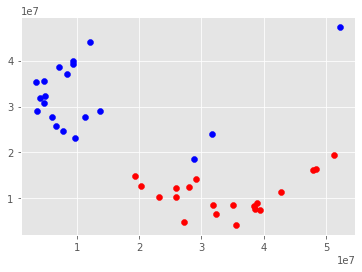

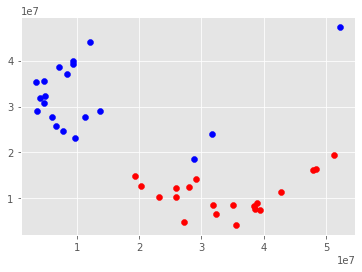

In [20]:
#just python experiments
from sklearn.cluster import KMeans
k=np.random.RandomState()
kmeans = KMeans(n_clusters=2,algorithm='full',random_state=k,max_iter=300)

r=kmeans.fit_transform(y_array)

#kmeans.score(principalComponents_y_array)
p=kmeans.transform(y_array)
print(p.shape)
colors=['red','blue']
labels=['step','sleep']
for i in range(40):
    plt.scatter(r[i][0],r[i][1],color=colors[int(i>=20)])
    
plt.show()
for i in range(40):
    plt.scatter(p[i][0],p[i][1],color=colors[int(i>=20)])
plt.show()

#kmeans.fit(principalComponents_y_array)
#y_kmeans = kmeans.predict(principalComponents_y_array)
#centers = kmeans.cluster_centers_
#scat(centers)
#plt.show()

In [21]:
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
from scipy import signal
from scipy.signal import find_peaks
import statistics

step=['step_00.npz', 'step_01.npz', 'step_02.npz', 'step_03.npz', 'step_04.npz', 'step_05.npz',
      'step_06.npz', 'step_07.npz', 'step_08.npz', 'step_09.npz', 'step_10.npz', 'step_11.npz',
      'step_12.npz', 'step_13.npz', 'step_14.npz', 'step_15.npz', 'step_16.npz', 'step_17.npz', 
      'step_18.npz', 'step_19.npz']
sleep=['sleep_00.npz', 'sleep_01.npz', 'sleep_02.npz', 'sleep_03.npz', 'sleep_04.npz', 'sleep_05.npz',
       'sleep_06.npz', 'sleep_07.npz', 'sleep_08.npz', 'sleep_09.npz', 'sleep_10.npz', 'sleep_11.npz',
       'sleep_12.npz', 'sleep_13.npz', 'sleep_14.npz', 'sleep_15.npz', 'sleep_16.npz', 'sleep_17.npz', 
       'sleep_18.npz', 'sleep_19.npz']
accgyr=np.empty((40,6,12000))
hrm=np.empty((40,3000))
for i in range(20):
    files = np.load(step[i])
    #files.close()
    accgyr[i,0,:np.size(files['acc'][:,0])]=files['acc'][:,0]
    accgyr[i,1,:np.size(files['acc'][:,1])]=files['acc'][:,1]
    accgyr[i,2,:np.size(files['acc'][:,2])]=files['acc'][:,2]
    accgyr[i,3,:np.size(files['gyr'][:,0])]=files['gyr'][:,0]
    accgyr[i,4,:np.size(files['gyr'][:,1])]=files['gyr'][:,1]
    accgyr[i,5,:np.size(files['gyr'][:,2])]=files['gyr'][:,2]
    hrm[i,:np.size(np.pad(files['hrm'], (0,2), 'constant'))]=np.pad(files['hrm'], (0,2), 'constant') #zero padding at the end of the signal and now len(hrm)=3000
    files = np.load(sleep[i])
    #files.close()
    accgyr[i+20,0,:np.size(files['acc'][:,0])]=files['acc'][:,0]
    accgyr[i+20,1,:np.size(files['acc'][:,1])]=files['acc'][:,1]
    accgyr[i+20,2,:np.size(files['acc'][:,2])]=files['acc'][:,2]
    accgyr[i+20,3,:np.size(files['gyr'][:,0])]=files['gyr'][:,0]
    accgyr[i+20,4,:np.size(files['gyr'][:,1])]=files['gyr'][:,1]
    accgyr[i+20,5,:np.size(files['gyr'][:,2])]=files['gyr'][:,2]
    hrm[i+20,:np.size(np.pad(files['hrm'], (0,2), 'constant'))]=np.pad(files['hrm'], (0,2), 'constant')

#print(accgyr[22,1,345])
def ste(sig,freq):
    E=np.convolve((sig*sig),np.hamming(20*freq),mode='same' ) #20sec window length*samplying frequency
    return E
def teo(sig):
    teager=np.empty(len(sig))
    for i in range(1,len(sig)-1):
        teager[i]=sig[i]*sig[i]-sig[i-1]*sig[i+1]
    teager[0]=teager[1]
    teager[len(sig)-1]=teager[len(sig)-2]
    return teager
def gaborfilt(sig,fc,a,fs):
    k=25 #number of filters
    a=fs/(2*k)
    b=a/fs
    N=int((3/b)+1)
    n=np.linspace(-N,N,(2*N+1))
    wc=2*np.pi*fc
    Wc=wc/fs
    h_n=np.exp((-1*b**2)*(n**2))*np.cos(Wc*n)
    return sp.signal.lfilter(h_n,1,sig)
def binfilter(sig): # H(z)= 0.25z^-1 +0.5 + 0.25z
    return sp.signal.lfilter([0.25,0.5,0.25],1,sig)
def mte(sig,window,win_len,win_overlap,fc,a,fs):
    mte = np.zeros(117)
    for j in range(117):
        broken=sig[(win_overlap)*j:((win_overlap)*j+win_len)]*window #separate sigral in to 400 or 100 sampled pieces
        mean_val = np.zeros(25)
        for i in range(25):
            gab=gaborfilt(broken,fc[i],a,fs) #apply gabor filter at each part of the initial signal
            t=teo(gab) #find teager opperators for gab
            binf=binfilter(binfilter(t)) #apply binomial filter to t
            #if (len(binf)==0):
            #    mean_val[i]=0
            #else:
            #    mean_val[i]=sum(binf)/len(binf)
            mean_val[i]=np.mean(binf[binf>0])
        mte[j]=np.ndarray.max(mean_val)
    return mte
def characteristics(sig):
    ch=np.empty(4)
    ch[0]=np.mean(sig)
    ch[1]=min(sig)
    ch[2]=max(sig)
    ch[3]=np.std(sig)
    return ch
accgyr_mte=np.zeros((40,6), dtype=object)
hrm_mte=np.zeros(40, dtype=object)
fs1=20
a1=fs1/50
fcmin1=a1/2
fcmax1=(fs1-a1)/2
f1=np.linspace(fcmin1,fcmax1,25)
fs2=5
a2=fs2/50
fcmin2=a2/2
fcmax2=(fs2-a2)/2
f2=np.linspace(fcmin2,fcmax2,25)
for i in range(20):
    accgyr_mte[i,0]=mte(accgyr[i,0,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i,1]=mte(accgyr[i,1,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i,2]=mte(accgyr[i,2,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i,3]=mte(accgyr[i,3,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i,4]=mte(accgyr[i,4,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i,5]=mte(accgyr[i,5,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    hrm_mte[i]= mte(hrm[i,:],sp.signal.get_window("hamming", 100),100,25,f2,a2,5)
    
    
    accgyr_mte[i+20,0]=mte(accgyr[i+20,0,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i+20,1]=mte(accgyr[i+20,1,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i+20,2]=mte(accgyr[i+20,2,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i+20,3]=mte(accgyr[i+20,3,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i+20,4]=mte(accgyr[i+20,4,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    accgyr_mte[i+20,5]=mte(accgyr[i+20,5,:],sp.signal.get_window("hamming", 400),400,100,f1,a1,20)
    hrm_mte[i+20]= mte(hrm[i+20,:],sp.signal.get_window("hamming", 100),100,25,f2,a2,5)
    accgyr_ste=np.empty((40,6), dtype=object)
hrm_ste=np.empty(40, dtype=object)
for i in range(20):
    accgyr_ste[i,0]=ste(accgyr[i,0,:],20)
    accgyr_ste[i,1]=ste(accgyr[i,1,:],20)
    accgyr_ste[i,2]=ste(accgyr[i,2,:],20)
    accgyr_ste[i,3]=ste(accgyr[i,3,:],20)
    accgyr_ste[i,4]=ste(accgyr[i,4,:],20)
    accgyr_ste[i,5]=ste(accgyr[i,5,:],20)
    hrm_ste[i]=ste(hrm[i,:],5)
    
    accgyr_ste[i+20,0]=ste(accgyr[i+20,0,:],20)
    accgyr_ste[i+20,1]=ste(accgyr[i+20,1,:],20)
    accgyr_ste[i+20,2]=ste(accgyr[i+20,2,:],20)
    accgyr_ste[i+20,3]=ste(accgyr[i+20,3,:],20)
    accgyr_ste[i+20,4]=ste(accgyr[i+20,4,:],20)
    accgyr_ste[i+20,5]=ste(accgyr[i+20,5,:],20)
    hrm_ste[i+20]=ste(hrm[i+20,:],5)

#np.isnan((accgyr_mte))
#print(chars)
#np.where(accgyr_mte==np.nan)
#print(np.argmin(accgyr_mte))
import sys
np.set_printoptions(threshold=sys.maxsize)
print(accgyr_mte)
np.seterr('raise')
chars=np.empty((40,56))
for i in range(40):
        j=0
        w=0
        while (j<56):
            if (j==24):
                chars[i,j]=characteristics(hrm_mte[i])[0]
            if (j==52):
                chars[i,j]=characteristics(hrm_ste[i])[0]
            elif (j<28 and w<6):
                chars[i,j]=characteristics(accgyr_mte[i,w])[0]
            elif (j>=28 and w>=7 and w<13):
                chars[i,j]=characteristics(accgyr_ste[i,np.abs(w-7)])[0]
            j+=4
            w+=1
        j=1
        w=0
        while (j<56):
            if (j==25):
                chars[i,j]=characteristics(hrm_mte[i])[1]
            if (j==53):
                chars[i,j]=characteristics(hrm_ste[i])[1]
            elif (j<28 and w<6):
                chars[i,j]=characteristics(accgyr_mte[i,w])[1]
            elif (j>=28 and w>=7 and w<13):
                chars[i,j]=characteristics(accgyr_ste[i,np.abs(w-7)])[1]
            j+=4
            w+=1
        w=0
        j=2
        while (j<56):
            if (j==26):
                chars[i,j]=characteristics(hrm_mte[i])[2]
            if (j==54):
                chars[i,j]=characteristics(hrm_ste[i])[2]
            elif (j<28 and w<6):
                chars[i,j]=characteristics(accgyr_mte[i,w])[2]
            elif (j>=28 and w>=7 and w<13):
                chars[i,j]=characteristics(accgyr_ste[i,np.abs(w-7)])[2]
            j+=4
            w+=1
        w=0
        j=3
        while (j<56):
            if (j==27):
                chars[i,j]=characteristics(hrm_mte[i])[3]
            if (j==55):
                chars[i,j]=characteristics(hrm_ste[i])[3]
            elif (j<28 and w<6):
                chars[i,j]=characteristics(accgyr_mte[i,w])[3]
            elif (j>=28 and w>=7 and w<13):
                chars[i,j]=characteristics(accgyr_ste[i,np.abs(w-7)])[3]
            j+=4
            w+=1

[[array([7.27230295e+01, 3.26969407e+01, 4.12681989e+01, 1.69439587e+01,
       6.93382631e+01, 7.59953264e+01, 3.80215921e+01, 3.03731771e+01,
       2.23973034e+01, 1.34776329e+01, 2.88392949e+01, 2.83565639e+01,
       4.00782207e+01, 8.83198635e+01, 1.71209169e+01, 2.50910530e+01,
       1.49043661e+01, 3.44762028e+01, 2.22314312e+01, 3.49839307e+00,
       3.01628033e+00, 4.22744830e+00, 4.19181430e+00, 1.14252431e+01,
       2.03227866e+01, 5.62528952e+01, 1.65302882e+01, 3.19824794e+00,
       1.20650614e+01, 5.03489226e+00, 1.48519354e+01, 9.71610297e+00,
       7.90604515e+00, 4.52819945e+01, 1.81125716e+01, 1.34679920e+00,
       5.56261559e+00, 1.54468770e+01, 6.04819422e+00, 2.04205116e+01,
       4.33873366e+00, 5.10734504e+01, 2.90657750e+01, 1.53920271e+01,
       9.43841412e+00, 4.55527192e-01, 6.88763814e+00, 5.37925933e+01,
       1.27910097e+01, 5.77926609e+00, 1.62942959e+01, 9.51438276e+00,
       1.00692884e+01, 2.60107214e+01, 9.90064523e+00, 5.70994522e+00,
    

In [24]:
np.save(r"C:\Users\Thanasis\Documents\DSP\array_thirdpart_n_ninaedition.npy",chars,allow_pickle=True)

In [54]:
chars
chars=chars-np.mean(chars,axis=0)
u, s, vt = np.linalg.svd(chars, full_matrices=False)
print(u.shape,s.shape,vt.shape)

l=np.empty(40)
for i in range(40):
    l[i]=(s[i]**2)/40
print(l)

v1 = vt[0,:] #computing right singular vectors
v2 = vt[1,:] #computing right singular vectors
print(v1.shape,v2.shape)

y1 = chars @ v1 #computing estimation of y1
y2 = chars @ v2 #computing estimation of y1
print(y1.shape,y2.shape)
print(vt)

(40, 40) (40,) (40, 56)
[3.16113773e+14 1.06200621e+14 9.71971627e+12 4.95923571e+12
 4.07043831e+12 1.23555411e+12 4.62752701e+11 2.06064786e+11
 7.41388296e+10 5.87611275e+10 6.83846825e+09 2.71708700e+09
 1.75614227e+09 9.41806563e+08 6.75519015e+08 2.21097823e+08
 1.47517310e+08 1.00693810e+08 2.93695111e+07 8.15332832e+06
 2.41144096e+06 2.10502735e+06 9.17776703e+05 5.12741758e+05
 3.50568707e+05 1.80579377e+05 1.16872932e+05 7.25987471e+04
 2.68968421e+04 1.47427750e+04 4.77606847e+03 3.75106723e+03
 1.02273196e+03 4.68659692e+02 1.76304967e+02 5.24658996e+01
 1.07259557e+01 1.36511769e+00 4.37485259e-01 2.38267089e-18]
(56,) (56,)
(40,) (40,)
[[-4.89105279e-06 -3.13786550e-08 -4.09629324e-05 -6.25486818e-06
  -5.01442015e-06 -1.58957381e-08 -5.23623799e-05 -8.79300183e-06
  -3.92989843e-06 -8.15595558e-09 -3.24599458e-05 -5.21634252e-06
  -4.00321100e-03 -1.03293660e-05 -3.18650277e-02 -4.84041035e-03
  -1.51581406e-03 -8.07178841e-06 -1.01525437e-02 -1.86158593e-03
  -4.282961

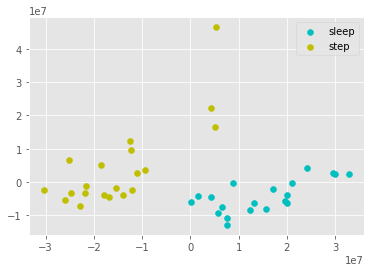

0 True True 1
1 True True 2
2 True True 3
3 True True 4
4 True True 5
5 True True 6
6 True True 7
7 True True 8
8 True True 9
9 True True 10
10 True True 11
11 True True 12
12 True True 13
13 True True 14
14 True True 15
15 True True 16
16 True True 17
17 True True 18
18 True True 19
19 True True 20
27 True True 21
28 True True 22
31 True True 23


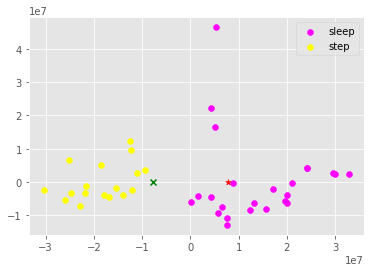

In [55]:
#a
percentage=l/sum(l)
#print(percentage)

#b
plt.scatter(y1[0:20],y2[0:20], c='c', label='sleep') #first 20 elements refer to sleep files
plt.scatter(y1[20:40],y2[20:40], c='y', label='step') #last 20 elements refer to step files
plt.legend()
plt.show()
centers=np.array([[y1[0],y2[0]],
                 [y1[20],y2[20]]]) #suppose that the initial centers are the ones described in the array 'centers'
D=0 #initial hole deformation equals to zero
step=0 #initialization phase

while 1: #unconditional loop for the steps required in the K-means algorithm
    sleep_x=np.zeros(40)
    sleep_y=np.zeros(40)
    step_x=np.zeros(40)
    step_y=np.zeros(40)
    
    if i!=0:
        D_last=D #initialization of value D(n-1)=D_last
        D=0 #D will be calculated and compared to D(n-1) at the end of the loop
    j=0
    k=0
    for i in range (40):
        d1=np.sqrt((y1[i]-centers[0][0])**2 + (y2[i]-centers[0][1])**2)
        d2=np.sqrt((y1[i]-centers[1][0])**2 + (y2[i]-centers[1][1])**2)
        #calculating distances of all points from initial centers
        #print("count:",i,"is :", d1<=d2)
        if d1<=d2:
            j+=1
            sleep_x[i]=y1[i]
            sleep_y[i]=y2[i]
        else:
            k+=1
            step_x[i]=y1[i]
            step_y[i]=y2[i]
   # print("hi, this is j,k :", j,k)        
    centers[0][0]=np.mean(sleep_x)
    centers[0][1]=np.mean(sleep_y)
    centers[1][0]=np.mean(step_x)
    centers[1][1]=np.mean(step_y)
    #update center's values
    
    dist1=sum(np.sqrt((sleep_x-centers[0][0])**2 + (sleep_y-centers[0][1])**2))
    dist2=sum(np.sqrt((step_x-centers[1][0])**2 + (step_y-centers[1][1])**2))
    
    D=dist1+dist2 #update deformation value
    #print("Am I optimized?: ",D<=D_last)
    
    if D<=D_last:
        break

j=0        
for i in range(39):
    
    if sleep_x[i]!=0 and sleep_y[i]!=0:
        j+=1
        print(i,sleep_y[i]!=0,sleep_y[i]!=0,j)
        plt.scatter(sleep_x[i],sleep_y[i], c='magenta')  
#bug for the (0,0) position no time for effecient handling              
plt.scatter(sleep_x[19],sleep_y[19], c='magenta', label='sleep')
plt.scatter(centers[0][0],centers[0][1], c='red', marker="*")
for i in range(39):
    #print(step_x[i],step_x[i]!=0)
    if step_x[i]!=0:
        plt.scatter(step_x[i],step_y[i], c='yellow')  
        
plt.scatter(step_x[39],step_y[39], c='yellow', label='step')
plt.scatter(centers[1][0],centers[1][1], c='green', marker="x")
plt.legend()
plt.show()

In [56]:
true = np.empty(40)
true[20:40]=1
pred = np.zeros(40)
#1 corresponds to step and 0 to sleep

for i in range(40):
    if (y1[i]==step_x[i]):
        pred[i] = 1
from sklearn.metrics import adjusted_rand_score

rand = adjusted_rand_score(true, pred)
print('Rand =', rand)

Rand = 0.7153659017686895
